# **Convert Raw Data Harga from String to Number**

In [ ]:
import pandas as pd
import re

In [ ]:
def convert_price_to_number(price_str):
    price_str = price_str.replace('Rp ', '').replace(',', '.')

    number = float(re.findall(r'[\d.]+', price_str)[0])

    if 'Miliar' in price_str:
        return number * 1000000000
    elif 'Juta' in price_str:
        return number * 1000000
    else:
        return number

df = pd.read_csv('5000_raw-rumah123.csv')

df['Harga'] = df['Harga'].apply(convert_price_to_number)

print("\nData setelah konversi Head:")
print(df[['Harga']].head())
print("\nData setelah konversi Tail:")
print(df[['Harga']].tail())

df.to_csv('convert-5000-data.csv', index=False)


Data setelah konversi Head:
          Harga
0  1.850000e+09
1  1.550000e+09
2  1.850000e+10
3  9.750000e+08
4  3.750000e+09

Data setelah konversi Tail:
             Harga
5035  1.400000e+09
5036  1.300000e+09
5037  2.300000e+09
5038  8.530000e+08
5039  1.450000e+09


# **Pre-Processing Data (Menghilangkan Data Ganda, dan Harga lebih dari 10M )**

# **Menghitung Harga Rata-Rata di Setiap Lokasi**

10 Lokasi dengan Rata-rata Harga Tertinggi:
                                   Lokasi        Harga
5               BSD Bukit Golf, Tangerang  39600000000
33             BSD Telaga Golf, Tangerang  22000000000
179   Sutera Buana Alam Sutera, Tangerang  21000000000
54                      Cihuni, Tangerang  16000000000
119             Lengkong Kulon, Tangerang  14966666666
1                  BSD Alegria, Tangerang  13000000000
180  Sutera Jingga Alam Sutera, Tangerang  11700000000
8                  BSD De Park, Tangerang  11360638297
129                 Pagedangan, Tangerang   9997222222
110                    Kosambi, Tangerang   8800000000

10 Lokasi dengan Rata-rata Harga Terendah:
                   Lokasi      Harga
45          Baros, Serang  166000000
73          Curug, Serang  166000000
175     Solear, Tangerang  175000000
52       Cibeber, Cilegon  190000000
128      Pabuaran, Serang  234000000
64   Cipocok Jaya, Serang  248000000
123           Maja, Lebak  251000000
100   Jelup

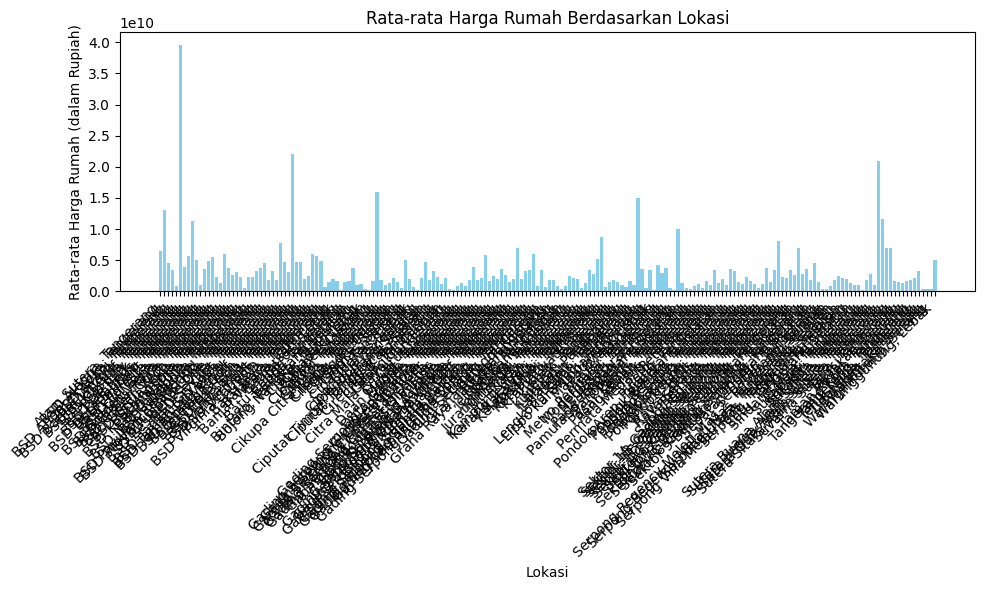

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari file CSV
data = pd.read_csv("convert-5000-data.csv")

# Buat kolom baru untuk harga dalam jutaan atau miliaran dan hilangkan desimal
data['Harga'] = data['Harga'].apply(lambda x: int(x))

# Kelompokkan data berdasarkan lokasi dan hitung rata-rata harga
avg_price_per_location = data.groupby('Lokasi')['Harga'].mean().reset_index()

# Hilangkan decimal
avg_price_per_location['Harga'] = avg_price_per_location['Harga'].apply(lambda x: int(x))

# Sort data untuk mendapatkan 10 teratas dan 10 terbawah
top_10 = avg_price_per_location.nlargest(10, 'Harga')
bottom_10 = avg_price_per_location.nsmallest(10, 'Harga')

# Tampilkan 10 lokasi dengan rata-rata harga tertinggi
print("10 Lokasi dengan Rata-rata Harga Tertinggi:")
print(top_10)

# Tampilkan 10 lokasi dengan rata-rata harga terendah
print("\n10 Lokasi dengan Rata-rata Harga Terendah:")
print(bottom_10)

# Visualisasikan rata-rata harga rumah per lokasi
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_location['Lokasi'], avg_price_per_location['Harga'], color='skyblue')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga Rumah (dalam Rupiah)')
plt.xticks(rotation=45, ha="right")
plt.title('Rata-rata Harga Rumah Berdasarkan Lokasi')
plt.tight_layout()
plt.show()